In [1]:
cd ..

/home/jovyan/Capstone/Github_my_version


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lib.plr import PLR, connect_line, flatten
import os
%matplotlib inline

## Transforming PLR into a trading signal ranging between 0 and 1

In [3]:
def up_down_trend(arr, epsilon):
    '''
    Classify point in a time series as either in an up trend or a down trend
    as determined by a PLR.
    
    Inputs
    - arr: numpy 1d-array of time-series values
    - epsilon: tolerance for PLR procedure
    
    Outputs
    - list of list of bools, where True indicates membership of an up trend
    '''
    pieces, lines, points = PLR(arr, epsilon)
    points.append(len(arr) - 1)
    diffs = np.diff(points)
    
    #I think this compensates for undercounting the first trend by one
    diffs[0] += 1 
    
    trend_labels = []
    
    for point, diff in zip(points[1:], diffs):
        half_diff, remainder = divmod(diff, 2)
        if remainder:
            half_diff += 1
        up = [arr[point] - arr[point - (half_diff)] > 0]
        trend_labels.append(up * diff)
    
    return trend_labels


def trading_signal(arr, epsilon):
    '''
    Convert a time-series into a trading signal ranging from 0 to 1.
    For more information refer to "A dynamic threshold decision system ..."
    by Chang et al.
   
    Inputs
    - arr: numpy 1d-array of time-series values
    - epsilon: tolerance for PLR procedure
   
    Outputs
    - numpy 1d-array with the same length as arr
    '''
    labels = up_down_trend(arr, epsilon)
   
    final_signal_list = []
    for trend_list in labels:
        up = any(trend_list)
        length = len(trend_list)
        half_length, remainder = divmod(length, 2)
       
        if remainder:
            half_length += 1
           
        if up:
            first_half = 1 - np.arange(length) / length
        else:
            first_half = 0 + np.arange(length) / length
       
        if remainder:
            trend_signal = first_half
        else:
            trend_signal = first_half
       
        final_signal_list.append(trend_signal)
       
    return np.concatenate(final_signal_list)

## Plotting the Trading Signal for AAPL

In [4]:
apple = pd.read_csv("data/sandp500/individual_stocks_15yr/AAPL_data.csv")
apple["Date"] = pd.to_datetime(apple["Date"])
apple = apple.set_index("Date")
close = apple["Close"].values

In [5]:
apple.tail(240)

,Unnamed: 0,Name,Open,High,Low,Close,Volume,Ex-Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,,,
2016-12-30,3535,AAPL,116.650,117.2000,115.4300,115.820,30586265.0,0.00,1.0,115.209202,115.752409,114.004271,114.389454,30586265.0
2017-01-03,3536,AAPL,115.800,116.3300,114.7600,116.150,28781865.0,0.00,1.0,114.369701,114.893155,113.342546,114.715378,28781865.0
2017-01-04,3537,AAPL,115.850,116.5100,115.7500,116.020,21118116.0,0.00,1.0,114.419083,115.070931,114.320318,114.586983,21118116.0
2017-01-05,3538,AAPL,115.920,116.8642,115.8100,116.610,22193587.0,0.00,1.0,114.488219,115.420756,114.379577,115.169696,22193587.0
2017-01-06,3539,AAPL,116.780,118.1600,116.4700,117.910,31751900.0,0.00,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0
2017-01-09,3540,AAPL,117.950,119.4300,117.9400,118.990,33561948.0,0.00,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0
2017-01-10,3541,AAPL,118.770,119.3800,118.3000,119.110,24462051.0,0.00,1.0,117.303017,117.905483,116.838822,117.638817,24462051.0
2017-01-11,3542,AAPL,118.740,119.9300,118.6000,119.750,27588593.0,0.00,1.0,117.273388,118.448689,117.135117,118.270913,27588593.0
2017-01-12,3543,AAPL,118.895,119.3000,118.2100,119.250,27086220.0,0.00,1.0,117.426473,117.826471,116.749934,117.777088,27086220.0


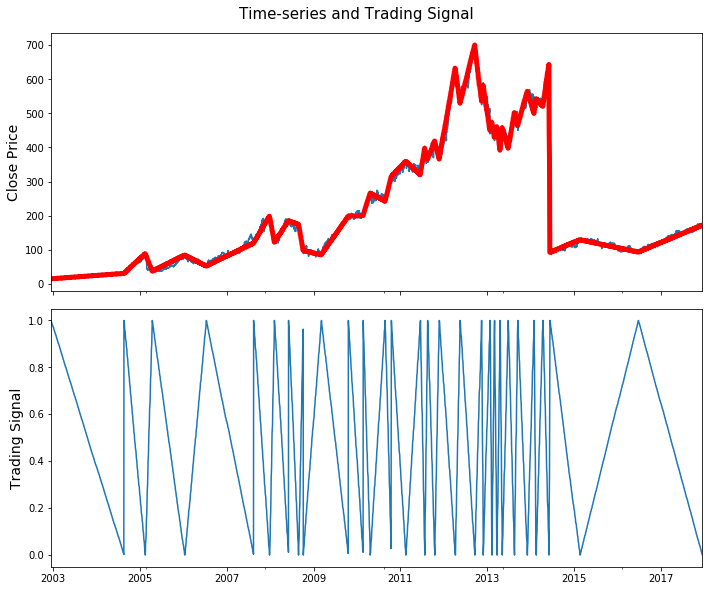

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex= True, figsize = (10, 8))
fig.suptitle("Time-series and Trading Signal", y = 1.02, size = 15)
xx = np.arange(len(close))
#ax1.plot(piece, c = "red")
apple["Close"].plot(ax = ax1 )
ax1.set_ylabel("Close Price", size = 14)

EPSILON = 25
piece, lines, points = PLR(close, EPSILON)
ax1.plot(apple.index, piece, c = "red", linewidth = 5, label = "PLR (threshold 20)")

ts= trading_signal(close, EPSILON)
ax2.plot(apple.index, ts)
ax2.set_ylabel("Trading Signal", size = 14)


plt.tight_layout()

In [23]:
apple['Close'][3626:]

Date
2017-05-12    156.100
2017-05-15    155.700
2017-05-16    155.470
2017-05-17    150.250
2017-05-18    152.540
2017-05-19    152.960
2017-05-22    153.990
2017-05-23    153.800
2017-05-24    153.340
2017-05-25    153.870
2017-05-26    153.610
2017-05-30    153.670
2017-05-31    152.760
2017-06-01    153.180
2017-06-02    155.450
2017-06-05    153.930
2017-06-06    154.450
2017-06-07    155.370
2017-06-08    154.990
2017-06-09    148.980
2017-06-12    145.320
2017-06-13    146.590
2017-06-14    145.160
2017-06-15    144.290
2017-06-16    142.270
2017-06-19    146.340
2017-06-20    145.010
2017-06-21    145.870
2017-06-22    145.630
2017-06-23    146.350
               ...   
2017-11-01    166.890
2017-11-02    168.110
2017-11-03    172.500
2017-11-06    174.250
2017-11-07    174.810
2017-11-09    175.880
2017-11-10    174.670
2017-11-13    173.970
2017-11-14    171.340
2017-11-15    169.080
2017-11-16    171.100
2017-11-17    170.150
2017-11-20    169.980
2017-11-21    173.140
2017-

In [9]:
def create_target(stock_csv, epsilon):   
    stock = pd.read_csv("data/sandp500/individual_stocks_15yr/" + stock_csv)
    stock["Date"] = pd.to_datetime(stock["Date"])
    stock = stock.set_index("Date")
    close = stock["Close"].values
    ts= trading_signal(close, epsilon)
    return ts

In [25]:
individuals = os.listdir(path = "data/sandp500/individual_stocks_15yr/")

for csv in individuals:
    signal = create_target(csv, 25)
    csv_path = "data/sandp500/individual_stocks_15yr_TECHNICALS/" + csv
    df = pd.read_csv(csv_path)
    signal = signal[249:]
    
    try:
        df['targets'] = signal
    except:
        signal = signal[250:]
        
    try:
        df['targets'] = signal
    except:
        signal = signal[301:]
        
    try:
        df['targets'] = signal
    except:
        print(len(signal), df.shape[0])
        
        
    df_targets = df
    df_targets.to_csv("data/sandp500/individual_stocks_15yr_buy_or_sell/" + csv)

2976 3526
2276 3076
2976 3526
447 1247
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2690 3490
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
226 1026
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2284 3084
0 93
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
1305 2105
2976 3526
1630 2430
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526
2976 3526


IndexError: index 0 is out of bounds for axis 0 with size 0

Need to determine what is causing the above bug, have enough targets for now

In [11]:
apple_sig = create_target('AAPL_data.csv', 30)
apple_sig = apple_sig[249:]

In [12]:
len(apple_sig)

3526

In [13]:
df = pd.read_csv("data/sandp500/individual_stocks_15yr_TECHNICALS/AAPL_data.csv")
df['targets'] = apple_sig
df.to_csv("data/sandp500/individual_stocks_15yr_buy_or_sell/AAPL_data.csv")